# Movie Suggester
## By: Haylee Bell, Marilyn Kathka, David Baker and Eduardo Belman
### After you finish watching a movie do you feel empty with nothing to do? This project aims to solve this problem by suggesting a similar movie to you, so you have something else to watch.

### Data Set: justwatch by victor-soeiro ([dataset](https://github.com/victor-soeiro/WebScraping-Projects/tree/main/justwatch))

This data was compiled by Victor Soeiro over many years of web scraping. The set he compiled is distributed through github and kaggle for research purposes. 

The data from this dataset was scraped from various streaming platforms such as amazon, apple tv, crunchyroll, darkmatter, disney, funimation, hbo, hulu, netflix, paramount, rakuten viki, and starz. 

The information included in the dataset from the movies/tv shows are the title, type, description, release year, age_certification, runtime, genres, production countries, seasons, imdb id, imdb score, imdb votes, imdb popularity and imdb score.

### Goal/Prediction
In this project we will predict which movies a user will be most likely to enjoy depending on the last movie he watched. To do this we will be using imdb score, release year, and runtime as predictors to find which movie the user should watch next. 


### Data Preparation
The data initially came separated in different files depending on what streaming service they were scraped from. What we did first was compile them into one file so the data is easier to manage. We titled this file raw_titles.csv and can be found here: [raw_titles.csv](https://raw.githubusercontent.com/Osprey-Corp/CST383-Final/main/raw_titles.csv)

This file contains 31393 different movies/tv shows.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Osprey-Corp/CST383-Final/main/raw_titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31393 entries, 0 to 31392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31393 non-null  object 
 1   title                 31392 non-null  object 
 2   type                  31393 non-null  object 
 3   description           31092 non-null  object 
 4   release_year          31393 non-null  int64  
 5   age_certification     15518 non-null  object 
 6   runtime               31393 non-null  int64  
 7   genres                31393 non-null  object 
 8   production_countries  31393 non-null  object 
 9   seasons               9780 non-null   float64
 10  imdb_id               28481 non-null  object 
 11  imdb_score            27762 non-null  float64
 12  imdb_votes            27717 non-null  float64
 13  tmdb_popularity       30499 non-null  float64
 14  tmdb_score            27312 non-null  float64
dtypes: float64(5), int6

Since we're creating a movie suggester and not a movie/tv show suggester we will be only be keeping entries with type MOVIE.

This reduced our working dataset from 31392 entries to 21613 entries.

In [8]:
df = df[df['type']=='MOVIE']
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 1 to 31392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21613 non-null  object 
 1   title                 21612 non-null  object 
 2   type                  21613 non-null  object 
 3   description           21492 non-null  object 
 4   release_year          21613 non-null  int64  
 5   age_certification     8781 non-null   object 
 6   runtime               21613 non-null  int64  
 7   genres                21613 non-null  object 
 8   production_countries  21613 non-null  object 
 9   seasons               0 non-null      float64
 10  imdb_id               19704 non-null  object 
 11  imdb_score            19289 non-null  float64
 12  imdb_votes            19246 non-null  float64
 13  tmdb_popularity       21045 non-null  float64
 14  tmdb_score            18967 non-null  float64
dtypes: float64(5), int6

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,21613.000000,21613.000000,0.0,19289.000000,1.924600e+04,21045.000000,18967.000000
mean,2002.105770,92.807847,NaN,6.017093,2.815906e+04,12.891558,6.109205
std,25.191473,29.174765,NaN,1.249080,1.101489e+05,58.056661,1.304201
min,1901.000000,0.000000,NaN,1.100000,5.000000e+00,0.000011,0.500000
25%,1997.000000,80.000000,NaN,5.300000,2.250000e+02,1.737000,5.400000
50%,2014.000000,93.000000,NaN,6.100000,1.164500e+03,3.933000,6.200000
75%,2019.000000,107.000000,NaN,6.900000,7.992500e+03,9.657000,7.000000
max,2022.000000,549.000000,NaN,9.900000,2.555504e+06,4447.894000,10.000000


### Data Exploration / Visualization


#### Average IMDB Score by Genre

Through our first experimentation with data exploration and visualization we grouped our data by genre and found out each genres average IMDB score. Through this experiment we found that the **Lowest Rated Genre** was **Horror** and **Highest Rated Genre** was **Documentation**.

genres
['action']           4.899180
['animation']        6.574359
['comedy']           6.027032
['crime']            5.816667
['documentation']    6.905603
['drama']            6.317478
['family']           5.595745
['fantasy']          5.492857
['history']          6.150000
['horror']           4.217564
['music']            6.812500
['romance']          5.886792
['scifi']            4.400000
['sport']            5.600000
['thriller']         5.186730
['war']              6.000000
['western']          5.705914
Name: imdb_score, dtype: float64

Lowest Rated Genre: ['horror'] Score: 4.217563739376771
Highest Rated Genre: ['documentation'] Score: 6.9056030389363725 



Text(0, 0.5, 'Average Score')

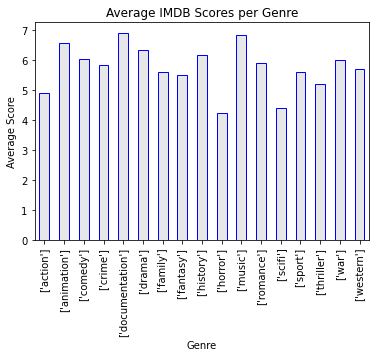

In [9]:
# Get dataframe grouped by genre, and displaying each genres average imdb score. We drop genres that are na.
single_category = df[df['genres'].str.count("'") == 2].groupby('genres')['imdb_score'].mean().dropna()

# Display data
print(single_category)
print('\nLowest Rated Genre:', single_category.idxmin(), 'Score:', single_category.min())
print('Highest Rated Genre:', single_category.idxmax(), 'Score:', single_category.max(), '\n')

# Graph data
single_category.plot.bar(color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue')
plt.title("Average IMDB Scores per Genre")
plt.xlabel("Genre")
plt.ylabel("Average Score")

#### Average IMDB Score by Year

In our second experiment we will group our data by release year and find out each release year's average IMDB score. Through this experiment we found that the **Lowest Rated Release Year** was **1935** and **Highest Rated Release Year** was **1926**. Through our graph we can see the in the beginning of the 20th century movies typically were rated higher than they currently are. 

release_year
1912    5.800000
1914    5.600000
1915    6.083333
1916    7.050000
1917    6.233333
          ...   
2018    5.840277
2019    5.951824
2020    5.839374
2021    5.834129
2022    6.262011
Name: imdb_score, Length: 110, dtype: float64

Lowest Rated Year: 1935 Score: 5.398701298701298
Highest Rated Year: 1926 Score: 7.1923076923076925 



Text(0, 0.5, 'Average Score')

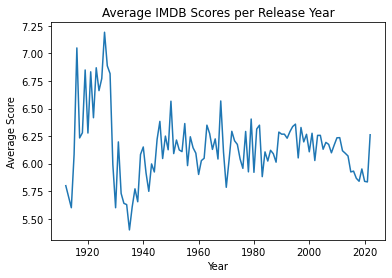

In [10]:
# Get dataframe grouped by release year, and displaying each release year's average imdb score. We drop genres that are na.
single_year = df.groupby('release_year')['imdb_score'].mean().dropna()

# Display data
print(single_year)
print('\nLowest Rated Year:', single_year.idxmin(), 'Score:', single_year.min())
print('Highest Rated Year:', single_year.idxmax(), 'Score:', single_year.max(), '\n')

# Graph data
single_year.plot.line()
plt.title("Average IMDB Scores per Release Year")
plt.xlabel("Year")
plt.ylabel("Average Score")

### Average Movie Runtime by Year

release_year
1901     2.000000
1902     8.000000
1903     2.000000
1904    21.000000
1906     8.000000
          ...    
2018    94.189969
2019    93.790486
2020    89.566957
2021    92.355464
2022    92.461207
Name: runtime, Length: 116, dtype: float64

Year with Lowest Runtime: 1901 Score: 2.0
Year with Highest Runtime: 1916 Score: 138.8 



Text(0, 0.5, 'Average Runtime (Minutes)')

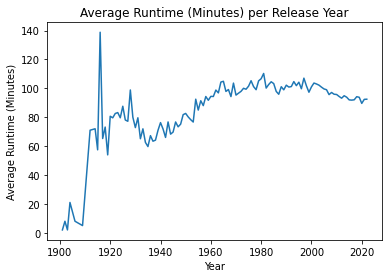

In [11]:
# Get dataframe grouped by release year, and displaying each release year's average imdb score. We drop genres that are na.
runtime_year = df.groupby('release_year')['runtime'].mean().dropna()

# Display data
print(runtime_year)
print('\nYear with Lowest Runtime:', runtime_year.idxmin(), 'Score:', runtime_year.min())
print('Year with Highest Runtime:', runtime_year.idxmax(), 'Score:', runtime_year.max(), '\n')

# Graph data
runtime_year.plot.line()
plt.title("Average Runtime (Minutes) per Release Year")
plt.xlabel("Year")
plt.ylabel("Average Runtime (Minutes)")

### Machine Learning

In [12]:
dfx        = df[['imdb_score', 'title', 'release_year', 'runtime']].dropna()
predictors = ['imdb_score', 'release_year', 'runtime']
target     = ['title']

X = dfx[predictors].values
y = dfx[target].values

# KNN can be slow, so get a random sample of the full data set
indexes = np.random.choice(y.size, size=10000)
X_mini  = X[indexes]
y_mini  = y[indexes]

# Split the data into training and test sets, and scale
scaler = StandardScaler()

# Unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30)

# Scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test  = scaler.transform(X_test_raw)

# Choose a random movie as the users choice
random_index = np.random.choice(dfx.shape[0])
print("Chosen Movie is:")
print("Title: "           + str(dfx.iloc[random_index]['title']) + 
      " - IMDB Score: "   + str(dfx.iloc[random_index]['imdb_score']) + 
      " - Release Year: " + str(dfx.iloc[random_index]['release_year']) +
      " - Runtime: "      + str(dfx.iloc[random_index]['runtime']))

# Find most similar movies to it
nn = NearestNeighbors(metric='cosine', n_neighbors=5).fit(X_train, y_train)
distances, indices = nn.kneighbors([[dfx.iloc[random_index]['imdb_score'], 
                                     dfx.iloc[random_index]['release_year'], 
                                     dfx.iloc[random_index]['runtime']]])

# Display similar movies to the user
print("\nRecommended Movies based on choice:")
for i in range(0, 5):
    print("Title: "           + str(dfx.iloc[indices[0][i]]['title']) + 
          " - IMDB Score: "   + str(dfx.iloc[indices[0][i]]['imdb_score']) + 
          " - Release Year: " + str(dfx.iloc[indices[0][i]]['release_year']) +
          " - Runtime: "      + str(dfx.iloc[indices[0][i]]['runtime']) +  
          " - Distance: "     + str(distances[0][i]))

Chosen Movie is:
Title: Expelled from Paradise - IMDB Score: 6.7 - Release Year: 2014 - Runtime: 104

Recommended Movies based on choice:
Title: Masterminds - IMDB Score: 5.2 - Release Year: 1997 - Runtime: 106 - Distance: 0.00018512567902984056
Title: Paycheck - IMDB Score: 6.3 - Release Year: 2003 - Runtime: 119 - Distance: 0.00034925176931333013
Title: Sky Racket - IMDB Score: 4.8 - Release Year: 1937 - Runtime: 63 - Distance: 0.00034925176931333013
Title: Alone - IMDB Score: 4.9 - Release Year: 2020 - Runtime: 92 - Distance: 0.00038670037313404126
Title: Visit to a Chief's Son - IMDB Score: 6.8 - Release Year: 1974 - Runtime: 85 - Distance: 0.0004673107914404673
